### Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 10000)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score

In [2]:
original_df = pd.read_csv('dataset_2277.csv')
original_df.dropna(inplace=True)

### Functions

In [3]:
def analysis_prediction_stats(df):
    TP = len(df[(df['won_predict'] == 1) & (df['won'] == 1)])
    TN = len(df[(df['won_predict'] == 0) & (df['won'] == 0)])
    FP = len(df[(df['won_predict'] == 1) & (df['won'] == 0)])
    FN = len(df[(df['won_predict'] == 0) & (df['won'] == 1)])

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return {
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN,
        'N': TP + TN + FP + FN,
        'accuracy': accuracy
    }

In [4]:
def make_stats_list(df):
    stats_list = []

    for player_name in df['player_name'].unique():
        player_df = df[df['player_name'] == player_name].copy()

        player_info = {
            'Name': player_name,
            'Current Rating': player_df['player_elo'].iloc[0],
            'Average Rating': round(np.mean(player_df['player_elo']))
        }

        player_info.update(analysis_prediction_stats(player_df))

        stats_list.append(player_info)

    return stats_list

# Log Regression, Predictors ['elo_diff']

In [5]:
df = original_df.copy()

X = df[['elo_diff']]
y = df['won']

kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    df.loc[df.index[test_index], 'won_predict'] = predictions
    
    test_acc = accuracy_score(y_test, predictions)
    accuracies.append(test_acc)

mean_test_acc = sum(accuracies) / len(accuracies)
print("MEAN TEST ACCURACY:", mean_test_acc)

df['won_predict'] = df['won_predict'].astype(int)
df['correct'] = df['won'] == df['won_predict']
print(df.head(20))

MEAN TEST ACCURACY: 0.5054888307707684
    player_name              opp_name  player_elo  opp_elo  elo_diff  color  x-ma5  x-ma20  opp_x-ma5  opp_x-ma20  won  won_predict  correct
19  BIG_TONKA_T               MedNef0        1453     1427        26   True    2.4   -6.65        7.0       -7.30    0            1    False
20  BIG_TONKA_T              Huss855c        1444     1442         2  False   -4.6    7.35       15.4       72.95    0            0     True
21  BIG_TONKA_T          waleedtahir6        1436     1386        50  False  -10.4  -49.60       -3.4      -25.75    1            1     True
22  BIG_TONKA_T               JHH1953        1443     1415        28   True   -1.2  -22.25        4.8        5.40    0            1    False
23  BIG_TONKA_T                 Al045        1434     1532       -98   True   -8.0   94.00       -4.8        5.30    0            0     True
24  BIG_TONKA_T            itobandito        1428     1403        25  False   -9.0  -35.75        1.6       17.35  

In [6]:
stats_df = pd.DataFrame(make_stats_list(df))

overall_average_accuracy = np.sum(stats_df['accuracy'] * stats_df['N']) / np.sum(stats_df['N'])
print('overall average accuracy', round(overall_average_accuracy, 5))
print('number of games analyzed:', np.sum(stats_df['N']))

stats_df

overall average accuracy 0.50548
number of games analyzed: 1733


,Name,Current Rating,Average Rating,TP,TN,FP,FN,N,accuracy
0,BIG_TONKA_T,1453,1452,23,14,21,18,76,0.486842
1,Andymcg12345,1514,1509,21,21,22,16,80,0.525000
2,alfmi1971,1464,1469,12,20,21,23,76,0.421053
3,majidsafavi,1455,1511,28,18,17,15,78,0.589744
4,riozawazz,1439,1449,14,22,24,18,78,0.461538
5,KINGBONECRUSHER,1429,1476,7,13,4,12,36,0.555556
6,TDVN,1596,1483,16,27,23,12,78,0.551282
7,KingGreg46,1504,1503,18,20,21,19,78,0.487179
8,Lucienslight,1564,1527,22,13,27,16,78,0.448718
9,tsavage88,1462,1471,11,10,11,11,43,0.488372


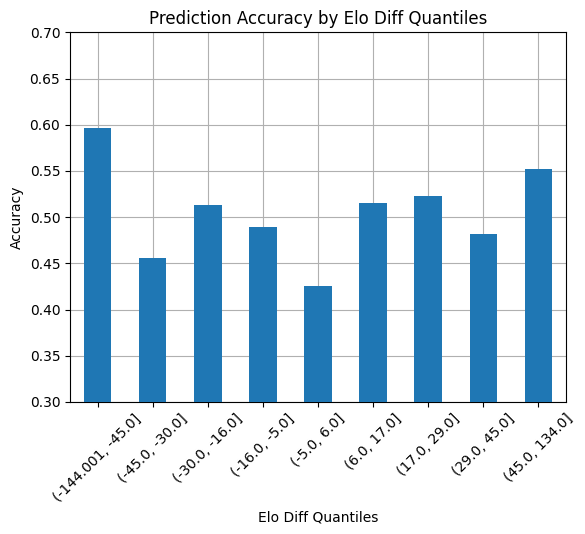

In [7]:
# accuracy by elo difference quantile
num_quantiles = 9
df['quantile'] = pd.qcut(df['elo_diff'], q=num_quantiles)
grouped = df.groupby('quantile', observed=False)['correct'].mean()
grouped.plot(kind='bar', zorder=3)

plt.xlabel('Elo Diff Quantiles')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy by Elo Diff Quantiles')
plt.grid(zorder=2)
plt.ylim(0.3, 0.7)

# Show the plot
plt.show()

# Log Regression, Predictors ['elo_diff', 'x-ma20']

In [8]:
df = original_df.copy()

X = df[['elo_diff', 'x-ma20']]
y = df['won']

kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    df.loc[df.index[test_index], 'won_predict'] = predictions
    
    test_acc = accuracy_score(y_test, predictions)
    accuracies.append(test_acc)

mean_test_acc = sum(accuracies) / len(accuracies)
print("MEAN TEST ACCURACY:", mean_test_acc)

df['won_predict'] = df['won_predict'].astype(int)
df['correct'] = df['won'] == df['won_predict']
print(df.head(20))

MEAN TEST ACCURACY: 0.5048941380286851
    player_name              opp_name  player_elo  opp_elo  elo_diff  color  x-ma5  x-ma20  opp_x-ma5  opp_x-ma20  won  won_predict  correct
19  BIG_TONKA_T               MedNef0        1453     1427        26   True    2.4   -6.65        7.0       -7.30    0            1    False
20  BIG_TONKA_T              Huss855c        1444     1442         2  False   -4.6    7.35       15.4       72.95    0            0     True
21  BIG_TONKA_T          waleedtahir6        1436     1386        50  False  -10.4  -49.60       -3.4      -25.75    1            1     True
22  BIG_TONKA_T               JHH1953        1443     1415        28   True   -1.2  -22.25        4.8        5.40    0            1    False
23  BIG_TONKA_T                 Al045        1434     1532       -98   True   -8.0   94.00       -4.8        5.30    0            0     True
24  BIG_TONKA_T            itobandito        1428     1403        25  False   -9.0  -35.75        1.6       17.35  

In [9]:
stats_df = pd.DataFrame(make_stats_list(df))

overall_average_accuracy = np.sum(stats_df['accuracy'] * stats_df['N']) / np.sum(stats_df['N'])
print('overall average accuracy', round(overall_average_accuracy, 5))
print('number of games analyzed:', np.sum(stats_df['N']))

stats_df

overall average accuracy 0.5049
number of games analyzed: 1733


,Name,Current Rating,Average Rating,TP,TN,FP,FN,N,accuracy
0,BIG_TONKA_T,1453,1452,23,14,21,18,76,0.486842
1,Andymcg12345,1514,1509,19,24,19,18,80,0.537500
2,alfmi1971,1464,1469,16,20,21,19,76,0.473684
3,majidsafavi,1455,1511,27,13,22,16,78,0.512821
4,riozawazz,1439,1449,15,28,18,17,78,0.551282
5,KINGBONECRUSHER,1429,1476,13,8,9,6,36,0.583333
6,TDVN,1596,1483,13,36,14,15,78,0.628205
7,KingGreg46,1504,1503,18,17,24,19,78,0.448718
8,Lucienslight,1564,1527,20,18,22,18,78,0.487179
9,tsavage88,1462,1471,11,9,12,11,43,0.465116


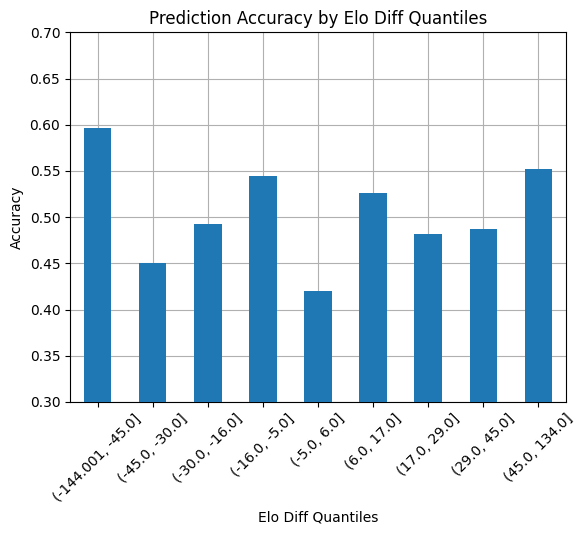

In [10]:
# accuracy by elo difference quantile
num_quantiles = 9
df['quantile'] = pd.qcut(df['elo_diff'], q=num_quantiles)
grouped = df.groupby('quantile', observed=False)['correct'].mean()
grouped.plot(kind='bar', zorder=3)

plt.xlabel('Elo Diff Quantiles')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy by Elo Diff Quantiles')
plt.grid(zorder=2)
plt.ylim(0.3, 0.7)

# Show the plot
plt.show()

0.5049396267837541
              precision    recall  f1-score   support

           0       0.50      0.42      0.45       448
           1       0.51      0.59      0.55       463

    accuracy                           0.50       911
   macro avg       0.50      0.50      0.50       911
weighted avg       0.50      0.50      0.50       911



<Figure size 1000x800 with 0 Axes>

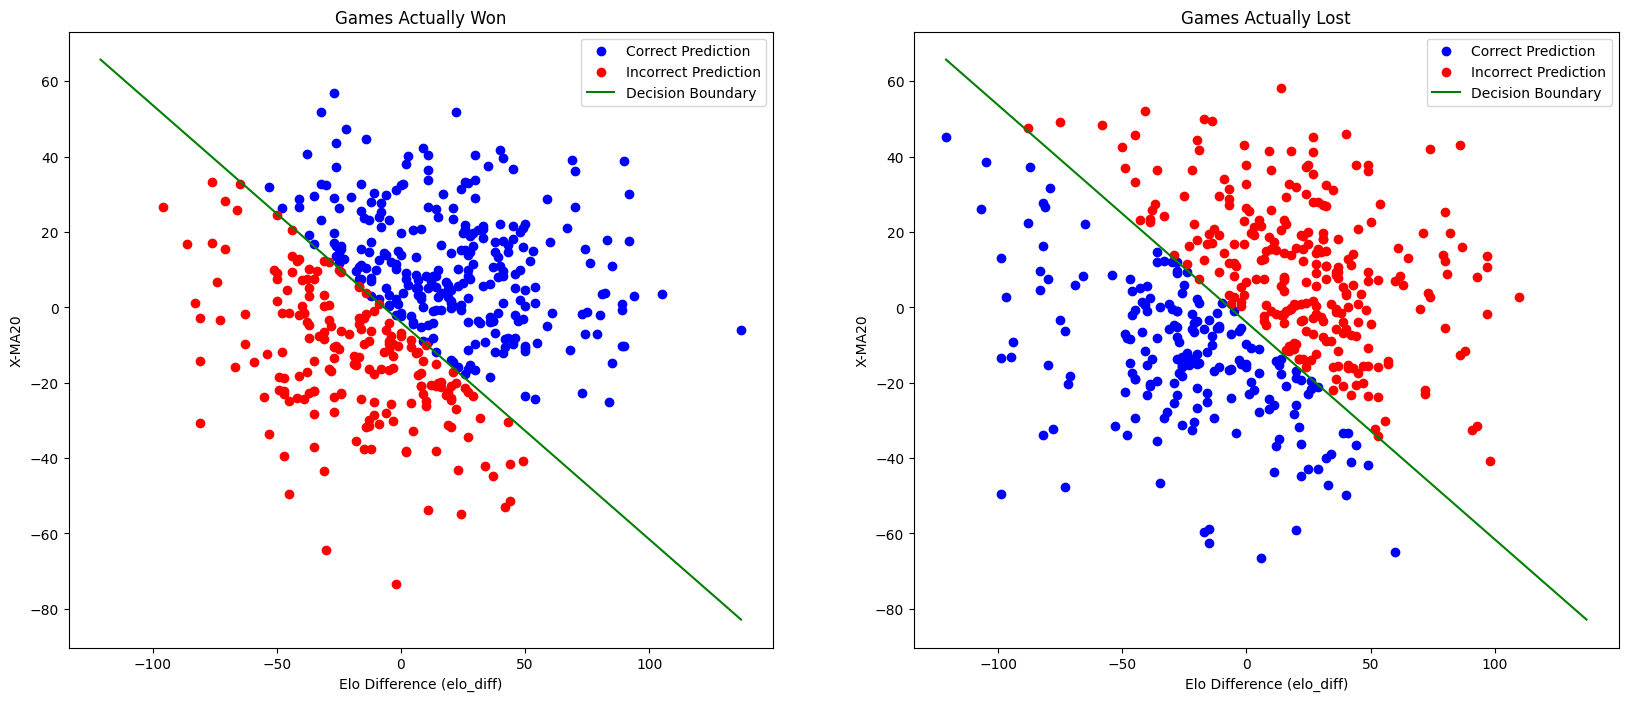

In [8]:
X = df[['elo_diff', 'x-ma20']]  # Predictors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

# Create a 2D scatter plot
plt.figure(figsize=(10, 8))

# Set up a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Adding a logit line
coef = model.coef_[0]
intercept = model.intercept_

# Create a grid of values
x_values = np.linspace(X_test['elo_diff'].min(), X_test['elo_diff'].max())
# Calculate the decision boundary (this is for a binary classifier with a 0.5 threshold)
y_values = -(intercept + coef[0] * x_values) / coef[1]

# Games actually won
actually_won = y_test == 1
correct_predictions_won = (predictions == y_test) & actually_won
incorrect_predictions_won = (predictions != y_test) & actually_won

ax1.scatter(X_test.loc[correct_predictions_won, 'elo_diff'], X_test.loc[correct_predictions_won, 'x-ma20'], 
            color='blue', label='Correct Prediction')
ax1.scatter(X_test.loc[incorrect_predictions_won, 'elo_diff'], X_test.loc[incorrect_predictions_won, 'x-ma20'], 
            color='red', label='Incorrect Prediction')
ax1.plot(x_values, y_values, label='Decision Boundary', color='green')
ax1.set_title('Games Actually Won')
ax1.set_xlabel('Elo Difference (elo_diff)')
ax1.set_ylabel('X-MA20')
ax1.legend()

# Games actually lost
actually_lost = y_test == 0
correct_predictions_lost = (predictions == y_test) & actually_lost
incorrect_predictions_lost = (predictions != y_test) & actually_lost

ax2.scatter(X_test.loc[correct_predictions_lost, 'elo_diff'], X_test.loc[correct_predictions_lost, 'x-ma20'], 
            color='blue', label='Correct Prediction')
ax2.scatter(X_test.loc[incorrect_predictions_lost, 'elo_diff'], X_test.loc[incorrect_predictions_lost, 'x-ma20'], 
            color='red', label='Incorrect Prediction')
ax2.plot(x_values, y_values, label='Decision Boundary', color='green')
ax2.set_title('Games Actually Lost')
ax2.set_xlabel('Elo Difference (elo_diff)')
ax2.set_ylabel('X-MA20')
ax2.legend()

# Display the plots
plt.show()

In [9]:
X = df[['elo_diff', 'x-ma5']]  # Predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.5159165751920965
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       448
           1       0.52      0.61      0.56       463

    accuracy                           0.52       911
   macro avg       0.51      0.51      0.51       911
weighted avg       0.51      0.52      0.51       911



0.5159165751920965
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       448
           1       0.52      0.61      0.56       463

    accuracy                           0.52       911
   macro avg       0.51      0.51      0.51       911
weighted avg       0.51      0.52      0.51       911



<Figure size 1000x800 with 0 Axes>

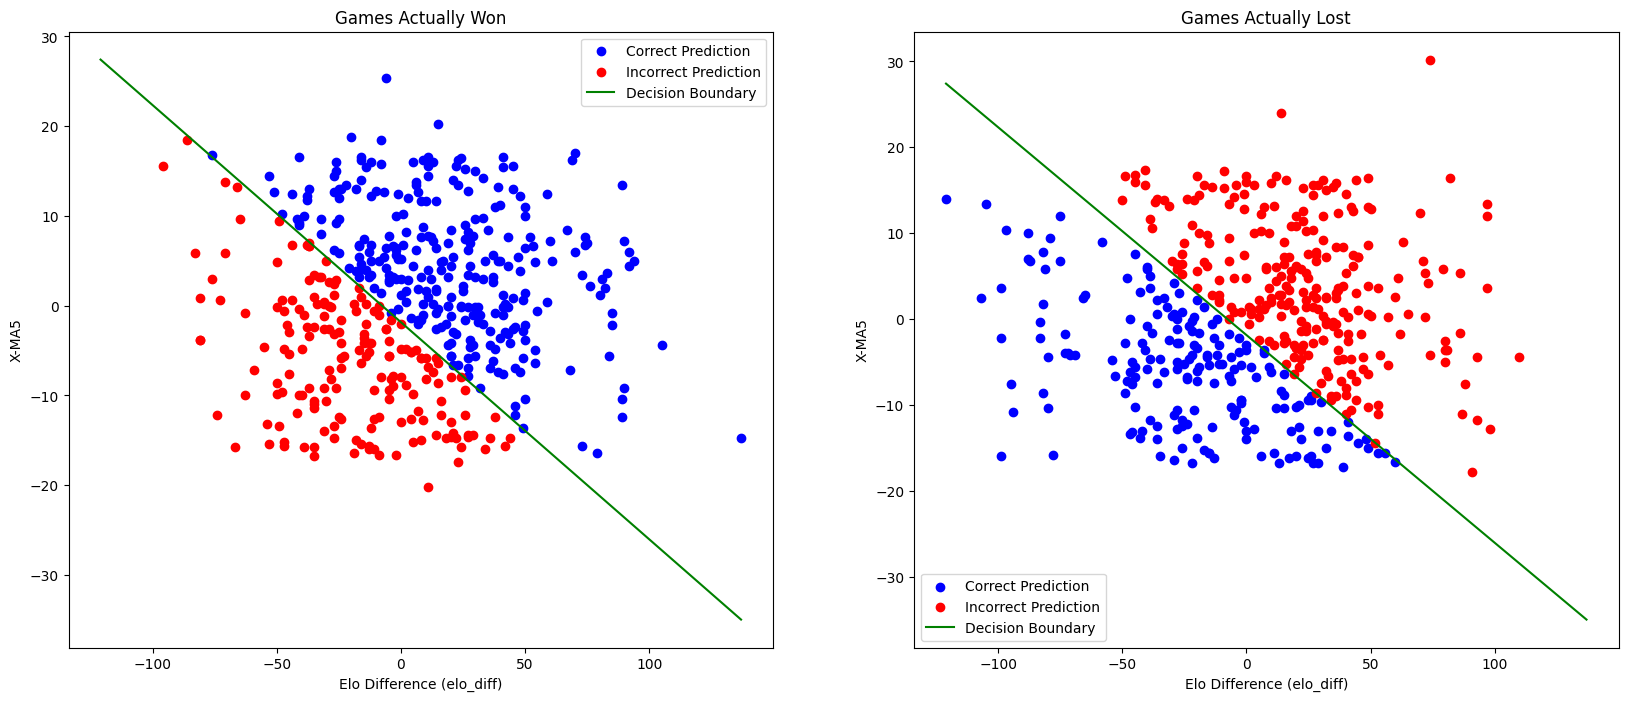

In [10]:
X = df[['elo_diff', 'x-ma5']]  # Predictors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

# Create a 2D scatter plot
plt.figure(figsize=(10, 8))

# Set up a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Adding a logit line
coef = model.coef_[0]
intercept = model.intercept_

# Create a grid of values
x_values = np.linspace(X_test['elo_diff'].min(), X_test['elo_diff'].max())
# Calculate the decision boundary (this is for a binary classifier with a 0.5 threshold)
y_values = -(intercept + coef[0] * x_values) / coef[1]

# Games actually won
actually_won = y_test == 1
correct_predictions_won = (predictions == y_test) & actually_won
incorrect_predictions_won = (predictions != y_test) & actually_won

ax1.scatter(X_test.loc[correct_predictions_won, 'elo_diff'], X_test.loc[correct_predictions_won, 'x-ma5'], 
            color='blue', label='Correct Prediction')
ax1.scatter(X_test.loc[incorrect_predictions_won, 'elo_diff'], X_test.loc[incorrect_predictions_won, 'x-ma5'], 
            color='red', label='Incorrect Prediction')
ax1.plot(x_values, y_values, label='Decision Boundary', color='green')
ax1.set_title('Games Actually Won')
ax1.set_xlabel('Elo Difference (elo_diff)')
ax1.set_ylabel('X-MA5')
ax1.legend()

# Games actually lost
actually_lost = y_test == 0
correct_predictions_lost = (predictions == y_test) & actually_lost
incorrect_predictions_lost = (predictions != y_test) & actually_lost

ax2.scatter(X_test.loc[correct_predictions_lost, 'elo_diff'], X_test.loc[correct_predictions_lost, 'x-ma5'], 
            color='blue', label='Correct Prediction')
ax2.scatter(X_test.loc[incorrect_predictions_lost, 'elo_diff'], X_test.loc[incorrect_predictions_lost, 'x-ma5'], 
            color='red', label='Incorrect Prediction')
ax2.plot(x_values, y_values, label='Decision Boundary', color='green')
ax2.set_title('Games Actually Lost')
ax2.set_xlabel('Elo Difference (elo_diff)')
ax2.set_ylabel('X-MA5')
ax2.legend()

# Display the plots
plt.show()

In [11]:
df['interaction'] = df['x-ma20'] * df['x-ma5']
X = df[['elo_diff', 'x-ma20', 'interaction']]  # Predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.5214050493962679
              precision    recall  f1-score   support

           0       0.52      0.40      0.45       448
           1       0.52      0.63      0.57       463

    accuracy                           0.52       911
   macro avg       0.52      0.52      0.51       911
weighted avg       0.52      0.52      0.51       911



# Logistic Regression, Predictors ['elo_diff', 'x-ma5']

In [11]:
df = original_df.copy()

X = df[['elo_diff', 'x-ma5']]
y = df['won']

kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    df.loc[df.index[test_index], 'won_predict'] = predictions
    
    test_acc = accuracy_score(y_test, predictions)
    accuracies.append(test_acc)

mean_test_acc = sum(accuracies) / len(accuracies)
print("MEAN TEST ACCURACY:", mean_test_acc)

df['won_predict'] = df['won_predict'].astype(int)
df['correct'] = df['won'] == df['won_predict']
print(df.head(20))

MEAN TEST ACCURACY: 0.5089520414452533
    player_name              opp_name  player_elo  opp_elo  elo_diff  color  x-ma5  x-ma20  opp_x-ma5  opp_x-ma20  won  won_predict  correct
19  BIG_TONKA_T               MedNef0        1453     1427        26   True    2.4   -6.65        7.0       -7.30    0            1    False
20  BIG_TONKA_T              Huss855c        1444     1442         2  False   -4.6    7.35       15.4       72.95    0            0     True
21  BIG_TONKA_T          waleedtahir6        1436     1386        50  False  -10.4  -49.60       -3.4      -25.75    1            1     True
22  BIG_TONKA_T               JHH1953        1443     1415        28   True   -1.2  -22.25        4.8        5.40    0            1    False
23  BIG_TONKA_T                 Al045        1434     1532       -98   True   -8.0   94.00       -4.8        5.30    0            0     True
24  BIG_TONKA_T            itobandito        1428     1403        25  False   -9.0  -35.75        1.6       17.35  

In [12]:
stats_df = pd.DataFrame(make_stats_list(df))

overall_average_accuracy = np.sum(stats_df['accuracy'] * stats_df['N']) / np.sum(stats_df['N'])
print('overall average accuracy', round(overall_average_accuracy, 5))
print('number of games analyzed:', np.sum(stats_df['N']))

stats_df

overall average accuracy 0.50894
number of games analyzed: 1733


,Name,Current Rating,Average Rating,TP,TN,FP,FN,N,accuracy
0,BIG_TONKA_T,1453,1452,24,16,19,17,76,0.526316
1,Andymcg12345,1514,1509,23,21,22,14,80,0.550000
2,alfmi1971,1464,1469,15,21,20,20,76,0.473684
3,majidsafavi,1455,1511,23,19,16,20,78,0.538462
4,riozawazz,1439,1449,17,22,24,15,78,0.500000
5,KINGBONECRUSHER,1429,1476,7,11,6,12,36,0.500000
6,TDVN,1596,1483,15,23,27,13,78,0.487179
7,KingGreg46,1504,1503,18,18,23,19,78,0.461538
8,Lucienslight,1564,1527,23,11,29,15,78,0.435897
9,tsavage88,1462,1471,11,9,12,11,43,0.465116


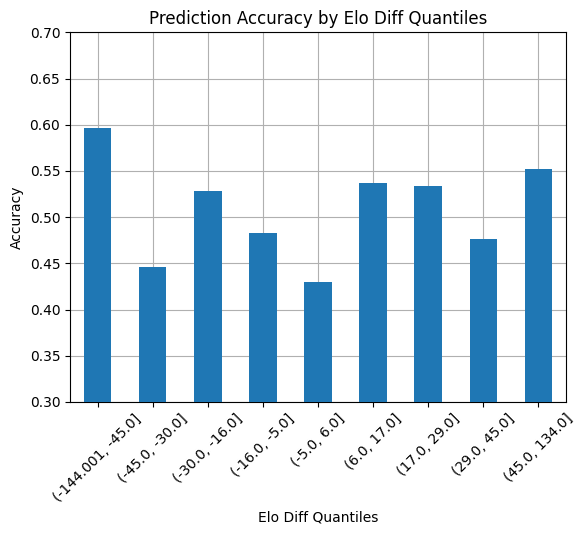

In [13]:
# accuracy by elo difference quantile
num_quantiles = 9
df['quantile'] = pd.qcut(df['elo_diff'], q=num_quantiles)
grouped = df.groupby('quantile', observed=False)['correct'].mean()
grouped.plot(kind='bar', zorder=3)

plt.xlabel('Elo Diff Quantiles')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy by Elo Diff Quantiles')
plt.grid(zorder=2)
plt.ylim(0.3, 0.7)

# Show the plot
plt.show()